# Hand written Digit Prediction - Classifier Analysis

<p> This is a model for Hand written digit prediction created using Random Forest Classifier algorithm. The dataset used is from scikit-learn dataset load_digits. This model gives the accuracy of 96%.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_digits


In [6]:
df = load_digits()

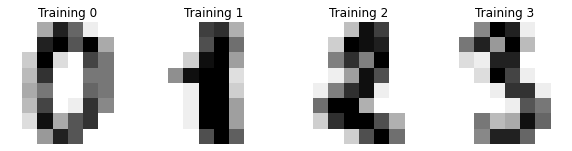

In [7]:
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10,3))
for ax, image, lable in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    ax.set_title("Training %i" %lable)


In [8]:
df.images.shape

(1797, 8, 8)

In [9]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
df.images[0].shape

(8, 8)

In [11]:
len(df.images)

1797

In [12]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))


In [13]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
data[0].shape

(64,)

In [16]:
data.shape

(1797, 64)

# Scaling image data

In [17]:
data.min()

0.0

In [19]:
data.max()

16.0

In [21]:
data = data/16

In [22]:
data.min()

0.0

In [23]:
data.max()

0.0625

In [24]:
data[0]

array([0.        , 0.        , 0.01953125, 0.05078125, 0.03515625,
       0.00390625, 0.        , 0.        , 0.        , 0.        ,
       0.05078125, 0.05859375, 0.0390625 , 0.05859375, 0.01953125,
       0.        , 0.        , 0.01171875, 0.05859375, 0.0078125 ,
       0.        , 0.04296875, 0.03125   , 0.        , 0.        ,
       0.015625  , 0.046875  , 0.        , 0.        , 0.03125   ,
       0.03125   , 0.        , 0.        , 0.01953125, 0.03125   ,
       0.        , 0.        , 0.03515625, 0.03125   , 0.        ,
       0.        , 0.015625  , 0.04296875, 0.        , 0.00390625,
       0.046875  , 0.02734375, 0.        , 0.        , 0.0078125 ,
       0.0546875 , 0.01953125, 0.0390625 , 0.046875  , 0.        ,
       0.        , 0.        , 0.        , 0.0234375 , 0.05078125,
       0.0390625 , 0.        , 0.        , 0.        ])

# Train Test Split Data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(data, df.target, test_size = 0.3)

In [27]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier()

In [30]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

# Predict Test Data

In [31]:
Y_pred = rf.predict(X_test)

In [32]:
Y_pred

array([8, 2, 1, 5, 6, 3, 7, 8, 5, 2, 4, 7, 4, 4, 6, 1, 2, 4, 8, 9, 1, 9,
       0, 3, 5, 8, 3, 1, 3, 1, 9, 7, 2, 7, 7, 8, 8, 7, 8, 9, 1, 8, 2, 8,
       7, 1, 3, 7, 7, 9, 2, 6, 6, 4, 0, 2, 4, 1, 7, 1, 5, 9, 6, 2, 3, 9,
       7, 9, 1, 6, 0, 9, 1, 3, 9, 0, 8, 9, 9, 5, 7, 2, 0, 0, 8, 6, 6, 3,
       9, 7, 1, 4, 5, 0, 4, 1, 1, 4, 6, 2, 4, 6, 3, 0, 5, 3, 4, 7, 4, 8,
       6, 6, 8, 3, 9, 0, 9, 8, 2, 7, 4, 3, 5, 0, 5, 5, 6, 2, 2, 8, 3, 1,
       8, 4, 4, 8, 1, 4, 6, 3, 7, 2, 4, 2, 9, 5, 2, 5, 7, 4, 5, 1, 8, 3,
       2, 3, 9, 4, 7, 2, 6, 8, 9, 6, 2, 1, 3, 7, 2, 3, 7, 7, 0, 6, 4, 5,
       0, 6, 8, 6, 2, 3, 7, 8, 9, 2, 0, 3, 7, 8, 5, 9, 9, 5, 9, 9, 8, 5,
       9, 1, 0, 9, 4, 9, 3, 3, 9, 3, 0, 6, 2, 7, 0, 2, 4, 0, 6, 3, 3, 8,
       2, 1, 5, 7, 5, 0, 2, 4, 7, 9, 2, 0, 5, 0, 2, 7, 1, 6, 6, 6, 5, 1,
       3, 8, 3, 7, 7, 8, 3, 1, 0, 3, 6, 9, 0, 3, 9, 2, 2, 7, 7, 5, 6, 0,
       0, 9, 7, 1, 3, 1, 0, 8, 7, 6, 0, 5, 5, 8, 5, 3, 6, 3, 2, 2, 9, 9,
       6, 9, 1, 7, 1, 5, 0, 0, 0, 1, 9, 4, 3, 4, 8,

# Model Accuracy

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
confusion_matrix = (Y_test, Y_pred)

In [36]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.92      1.00      0.96        49
           2       1.00      0.97      0.98        58
           3       1.00      0.92      0.96        72
           4       0.96      0.98      0.97        49
           5       0.92      0.94      0.93        48
           6       0.98      0.96      0.97        53
           7       0.98      0.98      0.98        61
           8       0.90      0.96      0.92        45
           9       0.94      0.92      0.93        53

    accuracy                           0.96       540
   macro avg       0.95      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



# Conclusion

<p> This model uses predefined data from scikit-learn for further upgrade the user defined datasets can be added for training that provides more accuracy.